In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
8540,45797306,25399,1756,HYUNDAI,Genesis,2009,Sedan,Yes,Petrol,3.8,142380 km,4,Automatic,Front,4-May,Left wheel,Beige,4
1902,45782164,7840,-,OPEL,Astra,1999,Hatchback,No,Petrol,1.8,199000 km,4,Manual,Front,4-May,Left wheel,Silver,0
18940,45785234,24148,-,BMW,X5,2008,Jeep,Yes,Petrol,3,245000 km,6,Automatic,Rear,4-May,Left wheel,Black,0
218,45774455,28225,639,BMW,328,2014,Sedan,Yes,Petrol,2.0 Turbo,56000 km,4,Tiptronic,Rear,4-May,Left wheel,White,0
15038,45802599,27259,640,HYUNDAI,Santa FE,2013,Jeep,Yes,Diesel,2,201373 km,4,Automatic,Front,4-May,Left wheel,Silver,4
9195,45758239,6272,1360,LEXUS,GX 470,2013,Jeep,Yes,Petrol,4.6,202651 km,8,Automatic,4x4,4-May,Left wheel,Black,0
11203,45810363,63826,1077,CHEVROLET,Malibu,2019,Sedan,Yes,Petrol,2,9101 km,4,Automatic,Front,4-May,Left wheel,Grey,4
2717,45815405,3136,781,TOYOTA,Camry,2012,Sedan,Yes,Hybrid,2.5,268683 km,4,Automatic,Front,4-May,Left wheel,Blue,12
14312,45730373,18826,707,SSANGYONG,REXTON,2011,Jeep,Yes,Diesel,2,186412 km,4,Automatic,Front,4-May,Left wheel,Silver,4
1863,45787418,6899,-,OPEL,Astra,1999,Hatchback,No,CNG,1.6,180000 km,4,Manual,Front,4-May,Left wheel,Silver,6


In [4]:
train['logPrice'] = np.log(train.Price)

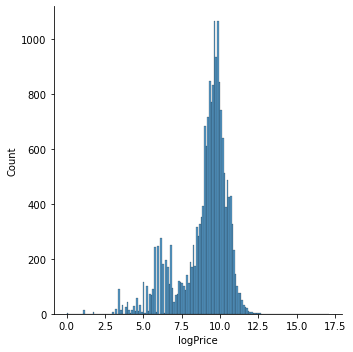

In [5]:
sns.displot(train.logPrice)

In [6]:
lowPrice = np.quantile(train.logPrice, 0.02)
highPrice = np.quantile(train.logPrice, 0.99)
print (lowPrice, highPrice)

4.700480365792417 11.346575677685973


<AxesSubplot:xlabel='cappedLogPrice', ylabel='Count'>

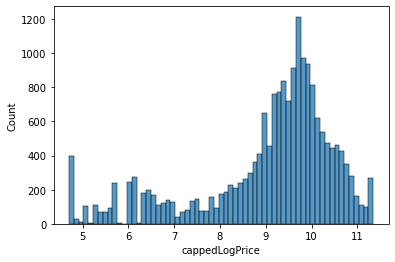

In [7]:
train['cappedLogPrice'] = train.logPrice
train.loc[train.logPrice < lowPrice, 'cappedLogPrice'] = lowPrice
train.loc[train.logPrice > highPrice, 'cappedLogPrice'] = highPrice
sns.histplot(train.cappedLogPrice)

<AxesSubplot:xlabel='cappedLogPrice'>

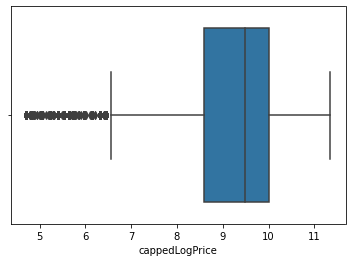

In [8]:
sns.boxplot(train.cappedLogPrice)

In [9]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'logPrice', 'cappedLogPrice'],
      dtype='object')

In [10]:
df_train = train.drop(columns=['ID', 'Price', 'logPrice'])
df_train.columns.to_list()

['Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'cappedLogPrice']

In [11]:
df_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,cappedLogPrice
0,-,GAZ,20,1953,Sedan,No,Petrol,2,0 km,4,Manual,Rear,4-May,Left wheel,Beige,0,10.854102
1,-,GAZ,20,1953,Jeep,No,Petrol,3.2,100000 km,4,Manual,4x4,2-Mar,Left wheel,Green,0,8.070906
2,-,GAZ,21,1964,Sedan,No,Petrol,2.4,0 km,4,Manual,Rear,4-May,Left wheel,Sky blue,0,8.966994
3,-,GAZ,24,1990,Universal,Yes,Petrol,6.3,2000 km,8,Manual,4x4,2-Mar,Left wheel,Green,0,8.581294
4,-,AUDI,50,2018,Coupe,Yes,Petrol,0.5,4000 km,1,Tiptronic,Rear,>5,Right-hand drive,Blue,0,7.170120


In [12]:
cat_cols = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
           'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
num_cols = ['Levy', 'Prod. year', 'Engine volume', 
            'Airbags', 'Cylinders', 'Mileage']
print (len(df_train.columns.to_list()), 
        len(cat_cols),
        len(num_cols))

17 9 6


In [14]:
sorted(train.Doors.unique())

['2-Mar', '4-May', '>5']

In [19]:
print (sorted(df_train.Manufacturer.unique()))

['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO', 'DAIHATSU', 'DODGE', 'FERRARI', 'FIAT', 'FORD', 'GAZ', 'GMC', 'GREATWALL', 'HAVAL', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI', 'LANCIA', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'MOSKVICH', 'NISSAN', 'OPEL', 'PEUGEOT', 'PONTIAC', 'PORSCHE', 'RENAULT', 'ROLLS-ROYCE', 'ROVER', 'SAAB', 'SATURN', 'SCION', 'SEAT', 'SKODA', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'UAZ', 'VAZ', 'VOLKSWAGEN', 'VOLVO', 'ZAZ', 'სხვა']


In [114]:
top_manufacturers = df_train.Manufacturer.value_counts().head(20).reset_index()['index'].to_list()

## Mileage

In [176]:
df_train.loc[df_train.Levy=='-', 'Levy'] = 0
df_train.Mileage = train.Mileage.apply(lambda x: int(x[:-3]))
df_train.loc[df_train.Mileage==0, 'Mileage'] = None
df_train['Mileage'] = df_train['Mileage'].\
                        fillna(df_train.groupby('Prod. year')['Mileage'].transform('median'))
df_train.Mileage.fillna(df_train.Mileage.mean(), inplace=True)
df_train.Mileage = np.log(df_train.Mileage)

In [118]:
df_train[num_cols].head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage
0,0,1953,2,0,4,0
1,0,1953,3.2,0,4,100000
2,0,1964,2.4,0,4,0
3,0,1990,6.3,0,8,2000
4,0,2018,0.5,0,1,4000


In [201]:
df_train.Levy = df_train.Levy.astype(int)

In [120]:
df_train['Engine volume'] = df_train['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_train['Engine volume'] = df_train['Engine volume'].astype(float)

In [122]:
df_train.loc[~df_train.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
for col in cat_cols:
    print (col, ': ', len(df_train[col].unique()))

Manufacturer :  21
Category :  11
Leather interior :  2
Fuel type :  7
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16


In [123]:
df_dummies = pd.get_dummies(df_train[cat_cols], drop_first=True)
df_dummies.tail()

,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,Manufacturer_FORD,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LEXUS,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
19232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Modelling

In [177]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = pd.concat([df_train[num_cols], df_dummies], axis=1)
y = df_train.cappedLogPrice
X_cols = X.columns.to_list()

X_train, X_test, y_train, y_test = train_test_split(X[X_cols], y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_cols)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_cols)

In [178]:
X_train.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
7808,0,2004,1.3,2,4,11.976659,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16766,364,2012,1.0,4,4,11.982929,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7285,1493,2016,3.5,4,4,10.693739,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15712,891,2016,2.0,4,4,11.627691,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16562,0,2011,2.4,9,4,12.711926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


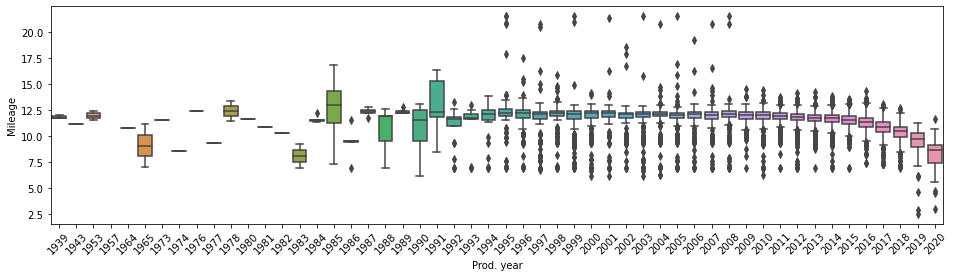

In [159]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='Mileage', x='Prod. year', data=X_train)
plt.xticks(rotation=45)
plt.show()

In [179]:
df_null = pd.DataFrame(X_train.isna().sum()).reset_index()
df_null.columns = ['Feature', 'isNull']
df_null.sort_values(by='isNull').tail()

,Feature,isNull
28,Category_Hatchback,0
29,Category_Jeep,0
30,Category_Limousine,0
16,Manufacturer_MAZDA,0
65,Color_Yellow,0


# Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(oob_score=True, random_state=42).fit(X_train_scaled, y_train)
rf_model.score(X_test_scaled, y_test)                              

0.6711008835222834

In [181]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(
        np.exp(y_test), 
        np.exp(rf_model.predict(X_test_scaled))))

0.8531149813910431

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

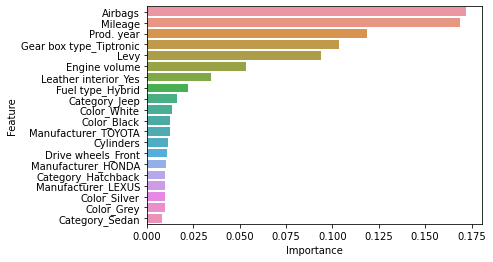

In [214]:
df_importance = pd.DataFrame(rf_model.feature_importances_, columns = ['Importance'])
df_importance['Feature'] = X_cols
df_importance = df_importance[['Feature', 'Importance']].sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_importance.head(20))

# Tuning Random Forest

In [252]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 188, 177, 166, 155, 144, 133, 122, 111, 100]}


In [254]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs = -1)# Fit the random search model

rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 188, 177, 166,
                                                         155, 144, 133, 122,
                                                         111, 100]},
                   random_state=42, verbose=2)

In [255]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=133)

In [256]:
rf_random.best_estimator_.score(X_test_scaled, y_test)

0.6957566823206806

In [257]:
rf_tuned = rf_random.best_estimator_

---


# Light GBM

In [248]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(verbose=0),
                                          KNeighborsRegressor(),
                                          LGBMRegressor(),
                                          SVR()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

In [249]:
stack_model = stack_gen.fit(X_train_scaled, y_train)
stack_model.score(X_test_scaled, y_test)

Learning rate set to 0.063493
0:	learn: 1.4573859	total: 9.95ms	remaining: 9.94s
1:	learn: 1.3946463	total: 17.8ms	remaining: 8.87s
2:	learn: 1.3370038	total: 25.7ms	remaining: 8.54s
3:	learn: 1.2820145	total: 34.8ms	remaining: 8.67s
4:	learn: 1.2325769	total: 41.3ms	remaining: 8.21s
5:	learn: 1.1868640	total: 51.8ms	remaining: 8.57s
6:	learn: 1.1440129	total: 59.1ms	remaining: 8.39s
7:	learn: 1.1053131	total: 68.6ms	remaining: 8.51s
8:	learn: 1.0697952	total: 76.7ms	remaining: 8.45s
9:	learn: 1.0367345	total: 85.7ms	remaining: 8.48s
10:	learn: 1.0070570	total: 92ms	remaining: 8.27s
11:	learn: 0.9792908	total: 101ms	remaining: 8.34s
12:	learn: 0.9545070	total: 108ms	remaining: 8.22s
13:	learn: 0.9319007	total: 117ms	remaining: 8.21s
14:	learn: 0.9115125	total: 123ms	remaining: 8.1s
15:	learn: 0.8929717	total: 132ms	remaining: 8.13s
16:	learn: 0.8763825	total: 140ms	remaining: 8.09s
17:	learn: 0.8601486	total: 148ms	remaining: 8.06s
18:	learn: 0.8454157	total: 157ms	remaining: 8.11s
19:

163:	learn: 0.6358581	total: 1.42s	remaining: 7.26s
164:	learn: 0.6356783	total: 1.44s	remaining: 7.27s
165:	learn: 0.6354147	total: 1.45s	remaining: 7.27s
166:	learn: 0.6347330	total: 1.46s	remaining: 7.27s
167:	learn: 0.6342850	total: 1.47s	remaining: 7.26s
168:	learn: 0.6339890	total: 1.48s	remaining: 7.25s
169:	learn: 0.6337947	total: 1.48s	remaining: 7.24s
170:	learn: 0.6334022	total: 1.5s	remaining: 7.25s
171:	learn: 0.6331447	total: 1.5s	remaining: 7.24s
172:	learn: 0.6327790	total: 1.51s	remaining: 7.23s
173:	learn: 0.6324415	total: 1.52s	remaining: 7.22s
174:	learn: 0.6322828	total: 1.53s	remaining: 7.2s
175:	learn: 0.6317919	total: 1.53s	remaining: 7.18s
176:	learn: 0.6313404	total: 1.54s	remaining: 7.17s
177:	learn: 0.6308587	total: 1.55s	remaining: 7.16s
178:	learn: 0.6301457	total: 1.56s	remaining: 7.14s
179:	learn: 0.6297607	total: 1.56s	remaining: 7.13s
180:	learn: 0.6292769	total: 1.57s	remaining: 7.11s
181:	learn: 0.6287880	total: 1.58s	remaining: 7.1s
182:	learn: 0.62

328:	learn: 0.5896001	total: 2.89s	remaining: 5.89s
329:	learn: 0.5892963	total: 2.9s	remaining: 5.89s
330:	learn: 0.5889647	total: 2.91s	remaining: 5.89s
331:	learn: 0.5886692	total: 2.92s	remaining: 5.88s
332:	learn: 0.5884036	total: 2.93s	remaining: 5.88s
333:	learn: 0.5882635	total: 2.94s	remaining: 5.87s
334:	learn: 0.5880046	total: 2.95s	remaining: 5.87s
335:	learn: 0.5878348	total: 2.97s	remaining: 5.86s
336:	learn: 0.5876091	total: 2.98s	remaining: 5.86s
337:	learn: 0.5873672	total: 2.99s	remaining: 5.85s
338:	learn: 0.5872094	total: 3s	remaining: 5.84s
339:	learn: 0.5869995	total: 3s	remaining: 5.83s
340:	learn: 0.5865303	total: 3.02s	remaining: 5.83s
341:	learn: 0.5862775	total: 3.03s	remaining: 5.82s
342:	learn: 0.5859204	total: 3.03s	remaining: 5.81s
343:	learn: 0.5857239	total: 3.04s	remaining: 5.8s
344:	learn: 0.5854562	total: 3.05s	remaining: 5.8s
345:	learn: 0.5851799	total: 3.07s	remaining: 5.8s
346:	learn: 0.5848275	total: 3.09s	remaining: 5.81s
347:	learn: 0.5846672	

490:	learn: 0.5561826	total: 4.81s	remaining: 4.99s
491:	learn: 0.5559491	total: 4.82s	remaining: 4.98s
492:	learn: 0.5556987	total: 4.83s	remaining: 4.97s
493:	learn: 0.5555971	total: 4.85s	remaining: 4.96s
494:	learn: 0.5554095	total: 4.86s	remaining: 4.95s
495:	learn: 0.5552518	total: 4.87s	remaining: 4.94s
496:	learn: 0.5550441	total: 4.88s	remaining: 4.94s
497:	learn: 0.5547520	total: 4.89s	remaining: 4.93s
498:	learn: 0.5546435	total: 4.9s	remaining: 4.92s
499:	learn: 0.5544607	total: 4.91s	remaining: 4.91s
500:	learn: 0.5544138	total: 4.92s	remaining: 4.9s
501:	learn: 0.5542984	total: 4.94s	remaining: 4.9s
502:	learn: 0.5542351	total: 4.95s	remaining: 4.89s
503:	learn: 0.5539783	total: 4.96s	remaining: 4.88s
504:	learn: 0.5538526	total: 4.97s	remaining: 4.88s
505:	learn: 0.5536865	total: 4.99s	remaining: 4.87s
506:	learn: 0.5534424	total: 5s	remaining: 4.87s
507:	learn: 0.5533021	total: 5.01s	remaining: 4.86s
508:	learn: 0.5530773	total: 5.02s	remaining: 4.84s
509:	learn: 0.5528

656:	learn: 0.5284899	total: 6.25s	remaining: 3.26s
657:	learn: 0.5282755	total: 6.25s	remaining: 3.25s
658:	learn: 0.5282041	total: 6.26s	remaining: 3.24s
659:	learn: 0.5279308	total: 6.27s	remaining: 3.23s
660:	learn: 0.5277626	total: 6.28s	remaining: 3.22s
661:	learn: 0.5275248	total: 6.28s	remaining: 3.21s
662:	learn: 0.5274434	total: 6.29s	remaining: 3.2s
663:	learn: 0.5273422	total: 6.3s	remaining: 3.19s
664:	learn: 0.5271827	total: 6.3s	remaining: 3.17s
665:	learn: 0.5267777	total: 6.31s	remaining: 3.16s
666:	learn: 0.5266412	total: 6.32s	remaining: 3.15s
667:	learn: 0.5265011	total: 6.32s	remaining: 3.14s
668:	learn: 0.5262841	total: 6.33s	remaining: 3.13s
669:	learn: 0.5261257	total: 6.33s	remaining: 3.12s
670:	learn: 0.5259799	total: 6.34s	remaining: 3.11s
671:	learn: 0.5258909	total: 6.35s	remaining: 3.1s
672:	learn: 0.5256579	total: 6.36s	remaining: 3.09s
673:	learn: 0.5255273	total: 6.36s	remaining: 3.08s
674:	learn: 0.5253797	total: 6.37s	remaining: 3.07s
675:	learn: 0.52

820:	learn: 0.5055541	total: 7.48s	remaining: 1.63s
821:	learn: 0.5054929	total: 7.49s	remaining: 1.62s
822:	learn: 0.5054088	total: 7.5s	remaining: 1.61s
823:	learn: 0.5053189	total: 7.5s	remaining: 1.6s
824:	learn: 0.5052376	total: 7.51s	remaining: 1.59s
825:	learn: 0.5052046	total: 7.52s	remaining: 1.58s
826:	learn: 0.5050640	total: 7.53s	remaining: 1.57s
827:	learn: 0.5049775	total: 7.54s	remaining: 1.56s
828:	learn: 0.5048764	total: 7.54s	remaining: 1.56s
829:	learn: 0.5048078	total: 7.55s	remaining: 1.55s
830:	learn: 0.5046367	total: 7.56s	remaining: 1.54s
831:	learn: 0.5045844	total: 7.57s	remaining: 1.53s
832:	learn: 0.5043980	total: 7.58s	remaining: 1.52s
833:	learn: 0.5043378	total: 7.58s	remaining: 1.51s
834:	learn: 0.5041929	total: 7.59s	remaining: 1.5s
835:	learn: 0.5041149	total: 7.6s	remaining: 1.49s
836:	learn: 0.5039325	total: 7.61s	remaining: 1.48s
837:	learn: 0.5037663	total: 7.61s	remaining: 1.47s
838:	learn: 0.5036142	total: 7.62s	remaining: 1.46s
839:	learn: 0.503

986:	learn: 0.4854961	total: 8.99s	remaining: 118ms
987:	learn: 0.4854103	total: 9s	remaining: 109ms
988:	learn: 0.4852719	total: 9.01s	remaining: 100ms
989:	learn: 0.4851212	total: 9.02s	remaining: 91.1ms
990:	learn: 0.4849662	total: 9.03s	remaining: 82ms
991:	learn: 0.4848224	total: 9.03s	remaining: 72.9ms
992:	learn: 0.4846913	total: 9.04s	remaining: 63.7ms
993:	learn: 0.4846129	total: 9.05s	remaining: 54.6ms
994:	learn: 0.4844986	total: 9.06s	remaining: 45.5ms
995:	learn: 0.4844299	total: 9.06s	remaining: 36.4ms
996:	learn: 0.4843858	total: 9.07s	remaining: 27.3ms
997:	learn: 0.4843050	total: 9.08s	remaining: 18.2ms
998:	learn: 0.4841315	total: 9.09s	remaining: 9.1ms
999:	learn: 0.4840137	total: 9.1s	remaining: 0us


0.6453627069503551

In [239]:
stack_model.score(X_test_scaled, y_test)

0.6453627069503551

In [242]:
from catboost import Pool

train_data = Pool(X_train_scaled)

cat_model = CatBoostRegressor(verbose=0).fit(X_train_scaled, y_train)
interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train_scaled.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

,feature1,feature2,importance
0,Prod. year,Mileage,4.616423
1,Levy,Mileage,4.558673
2,Engine volume,Mileage,3.408574
3,Airbags,Mileage,2.975012
4,Levy,Prod. year,2.347115
5,Levy,Airbags,2.296880
6,Prod. year,Engine volume,2.257455
7,Prod. year,Airbags,2.044516
8,Mileage,Manufacturer_TOYOTA,1.315666
9,Cylinders,Mileage,1.248015


In [131]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [192]:
df_test = test.drop(columns = 'ID')

df_test.loc[df_test.Levy=='-', 'Levy'] = 0
df_test.loc[df_test.Doors=='04-May', 'Doors'] = '4-May'
df_test.loc[df_test.Doors=='02-Mar', 'Doors'] = '2-Mar'

df_test.Mileage = df_test.Mileage.apply(lambda x: int(x[:-3]))
df_test.loc[df_test.Mileage==0, 'Mileage'] = None
df_test['Mileage'] = df_test['Mileage'].\
                        fillna(df_test.groupby('Prod. year')['Mileage'].transform('median'))
df_test.Mileage.fillna(df_test.Mileage.mean(), inplace=True)
df_test.Mileage = np.log(df_test.Mileage)

df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_test['Engine volume'] = df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))

df_test.Levy = df_test.Levy.astype(int)
df_test.loc[df_test.Cylinders > 15, 'Cylinders'] = 15

df_test.loc[~df_test.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
df_dummies_test = pd.get_dummies(df_test[cat_cols], drop_first=True)

#############################################

X_submit = pd.concat([df_test[num_cols], df_dummies_test], axis=1)
X_submit_scaled = pd.DataFrame(scaler.transform(X_submit), columns=X_cols)
X_submit_scaled.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,-1.111134,0.191152,-0.348790,0.788730,-0.486096,0.257966,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,2.638409,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084
1,-1.111134,0.191152,0.103422,0.788730,-0.486096,-1.413790,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,2.638409,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084
2,-1.111134,-1.039436,-0.914055,0.326277,-0.486096,0.408518,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,-0.379016,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,12.824707,-0.549095,-0.074084
3,0.607795,0.191152,1.007846,1.251183,1.179761,0.251160,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,-0.379016,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084
4,-1.111134,-3.149016,-0.801002,-1.523534,-0.486096,0.578801,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,-0.379016,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084


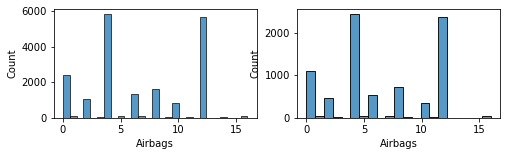

In [206]:
plt.figure(figsize=(8, 2))
plt.subplot(121); sns.histplot(df_train.Airbags)
plt.subplot(122); sns.histplot(df_test.Airbags)
plt.show()

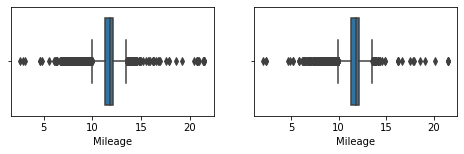

In [205]:
plt.figure(figsize=(8, 2))
plt.subplot(121); sns.boxplot(X_train.Mileage)
plt.subplot(122); sns.boxplot(X_submit.Mileage)
plt.show()

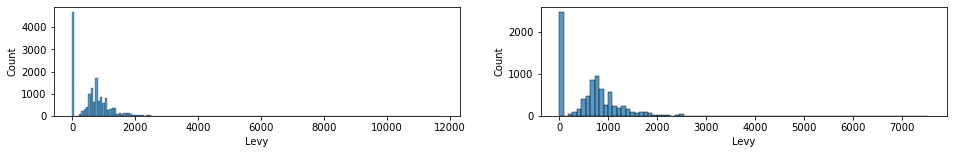

In [204]:
plt.figure(figsize=(16, 2))
plt.subplot(121); sns.histplot(X_train.Levy)
plt.subplot(122); sns.histplot(X_submit.Levy)
plt.show()

In [197]:
X_submit.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,2012,2.0,10,4,11.877569,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,2012,2.4,10,4,10.165852,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2005,1.5,8,4,12.031719,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,975,2012,3.2,12,6,11.870600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1993,1.6,0,4,12.206073,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


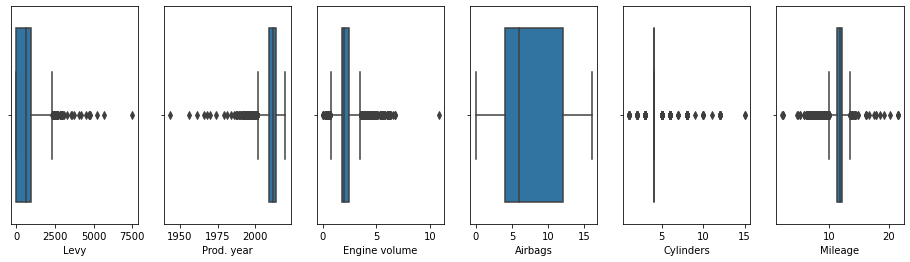

In [198]:
plt.figure(figsize=(16,4))
for col in num_cols:
    plt.subplot(1, len(num_cols), num_cols.index(col)+1)
    sns.boxplot(df_test[col])

In [199]:
y_submit = pd.DataFrame(np.round(np.exp(rf_model.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)

In [258]:
y_submit = pd.DataFrame(np.round(np.exp(rf_tuned.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)